<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/TF2_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
#This is going to be synthetic data - dat that'll be created by the programmer
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Make the dataset 
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between [-3, +3]
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function

                            y = cos(2x1) + cos(3x2)



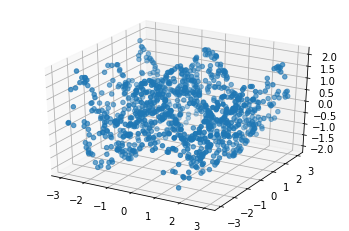

In [4]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.imshow()

In [5]:
# Build the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [6]:
# Compile and fit 
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.9443
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8873
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8654
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8449
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8025
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7559
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6378
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5846
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5828
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5514
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5381
Epoch 13/100
32/32 [=================

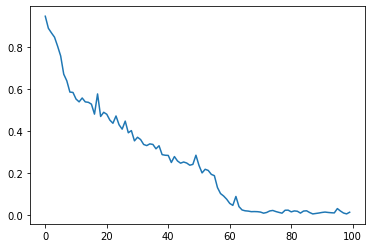

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

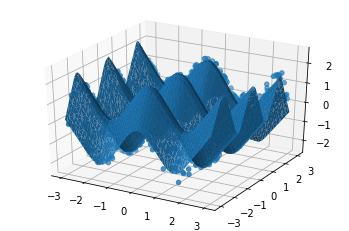

In [10]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

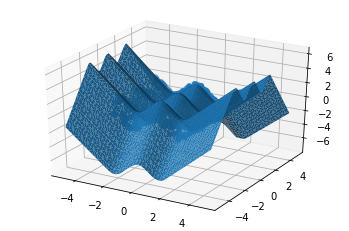

In [12]:
# can it extrapolate?
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()